In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<AxesSubplot:title={'center':'# feature matches'}, ylabel='symlog scale'>

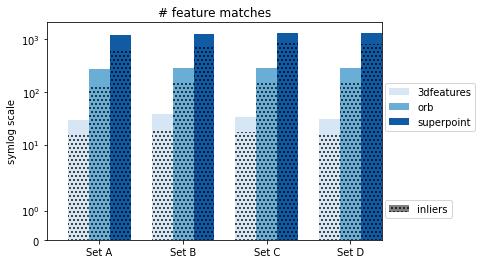

In [2]:
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
    
    Arguments
    ---------
    - labels: list of the names of the dataframe, used for the legend
    - title: a string for the title of the plot
    - H: the hatch used for identification of the different dataframe
    """
    
    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)

    axe = plt.subplot(111)
    gradient = cm.get_cmap("Blues")

    for i,df in enumerate(dfall) : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      color= gradient(float(i + 0.5)/n_df),
                      **kwargs)  # make bar plots

    H = ['...', '']
    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H[j]) 
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_ylabel("symlog scale")
    axe.set_title('# feature matches')
    plt.yscale('symlog')

    n=[]        
    n.append(axe.bar(0, 0, color="gray", hatch=H[0]))

    m = []
    for i in range(3):
        m.append(axe.bar(0, 0, color=gradient(float(i + 0.5)/n_df)))

    # l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    l1 = axe.legend(m, ['3dfeatures', 'orb', 'superpoint'], loc=[1.01, 0.5])
    plt.legend(n, ['inliers'], loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    plt.savefig('inliers_plot.png', dpi=1000, transparent=False,bbox_inches='tight')

    return axe


# create dataframes
orb = pd.DataFrame(np.array([[128, 146, 154, 148],
                             [144, (280 - 146), 280 - 154, 280 - 148]
                            ]).T,
                   index = ["Set A", "Set B", "Set C", "Set D"],
                   columns = ["inliers", "matches"])
features_3d = pd.DataFrame(np.array([[15, 20, 17, 16], 
                                     [29 - 15, 38 - 20, 33 - 17, 30 - 16]
                                    ]).T,
                   index = ["Set A", "Set B", "Set C", "Set D"],
                   columns = ["inliers", "matches"])
superpoint = pd.DataFrame(np.array([[662, 767, 843, 804], 
                                    [1226 - 662, 1278 - 767, 1338 - 843, 1318 - 804]
                                   ]).T,
                   index = ["Set A", "Set B", "Set C", "Set D"],
                   columns = ["inliers", "matches"])

# Then, just call :
plot_clustered_stacked([features_3d, orb, superpoint], ["3dfeatures", "orb", "superpoint"])